In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib import dates

In [12]:
# dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')
# data = pd.read_csv('household_power_consumption.txt', engine='python', sep=';', parse_dates={'datetime': ['Date', 'Time']},
#                     date_parser=dateparse)
# subdata = data[(data.datetime>pd.Timestamp(2007,2,1)) & (data.datetime<pd.Timestamp(2007,2,3))]
# subdata.index = subdata.datetime
# subdata.drop(columns=['datetime'], axis=1,inplace=True)
# subdata.to_csv('sub.csv')

In [13]:
subdata = pd.read_csv('sub.csv', index_col='datetime', parse_dates=['datetime'])

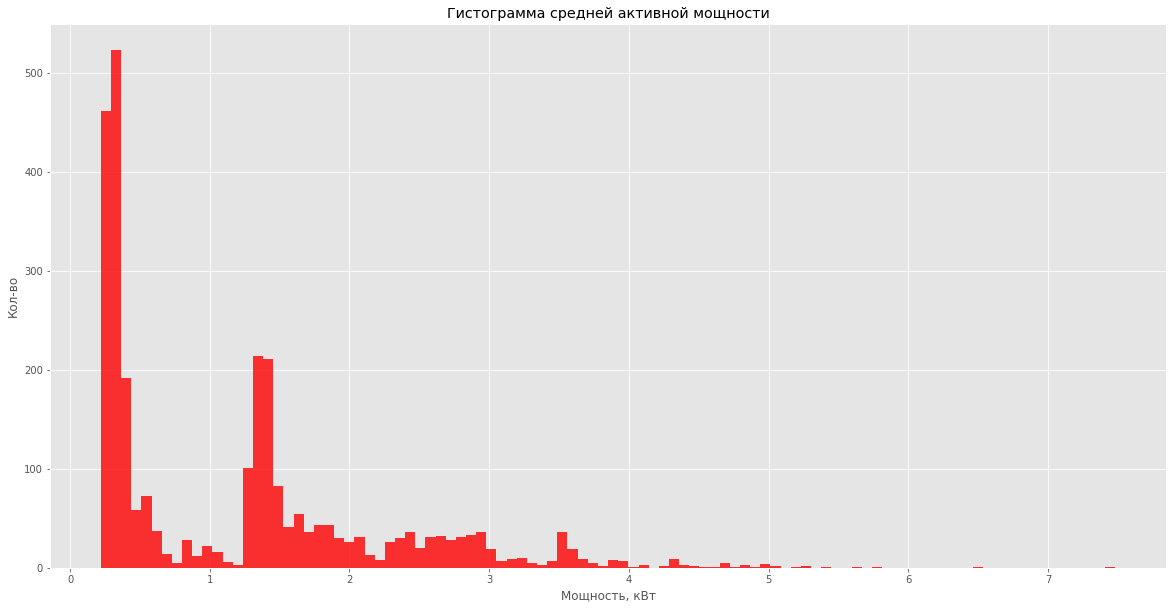

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111) 
plt.title('Гистограмма средней активной мощности')
plt.ylabel('Кол-во')
plt.xlabel('Мощность, кВт')
subdata.Global_active_power.hist(color='r', bins=100, alpha = 0.8, figsize=(20,10))

In [14]:
x_g = subdata.index
ap_g = subdata.Global_active_power
rp_g = subdata.Global_reactive_power
c_g = subdata.Global_intensity
s1_g = subdata.Sub_metering_1
s2_g = subdata.Sub_metering_2
s3_g = subdata.Sub_metering_3

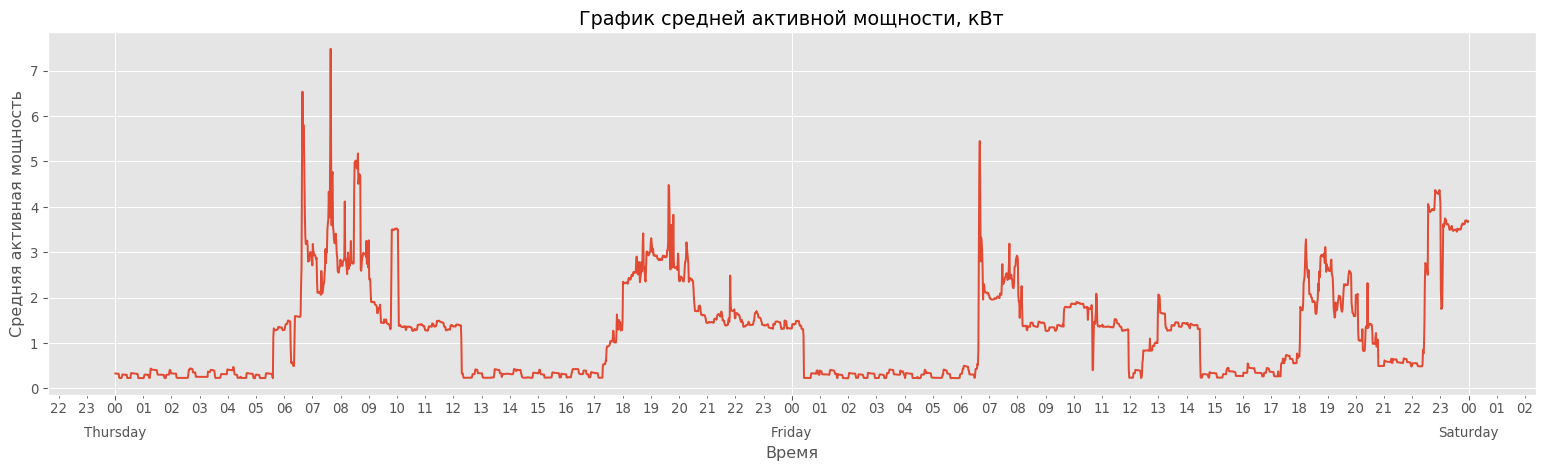

In [7]:
fig = plt.figure(figsize=(20,5), dpi = 96)
ax = fig.add_subplot(111) 
plt.title('График средней активной мощности, кВт')
plt.ylabel('Средняя активная мощность')
plt.xlabel('Время')
ax.xaxis.set_major_formatter(dates.DateFormatter('%A'))
ax.xaxis.set_major_locator(dates.DayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H'))
ax.xaxis.set_minor_locator(dates.HourLocator())
ax.tick_params(axis='x', which='major', pad=20)
plt.plot(x_g, ap_g)

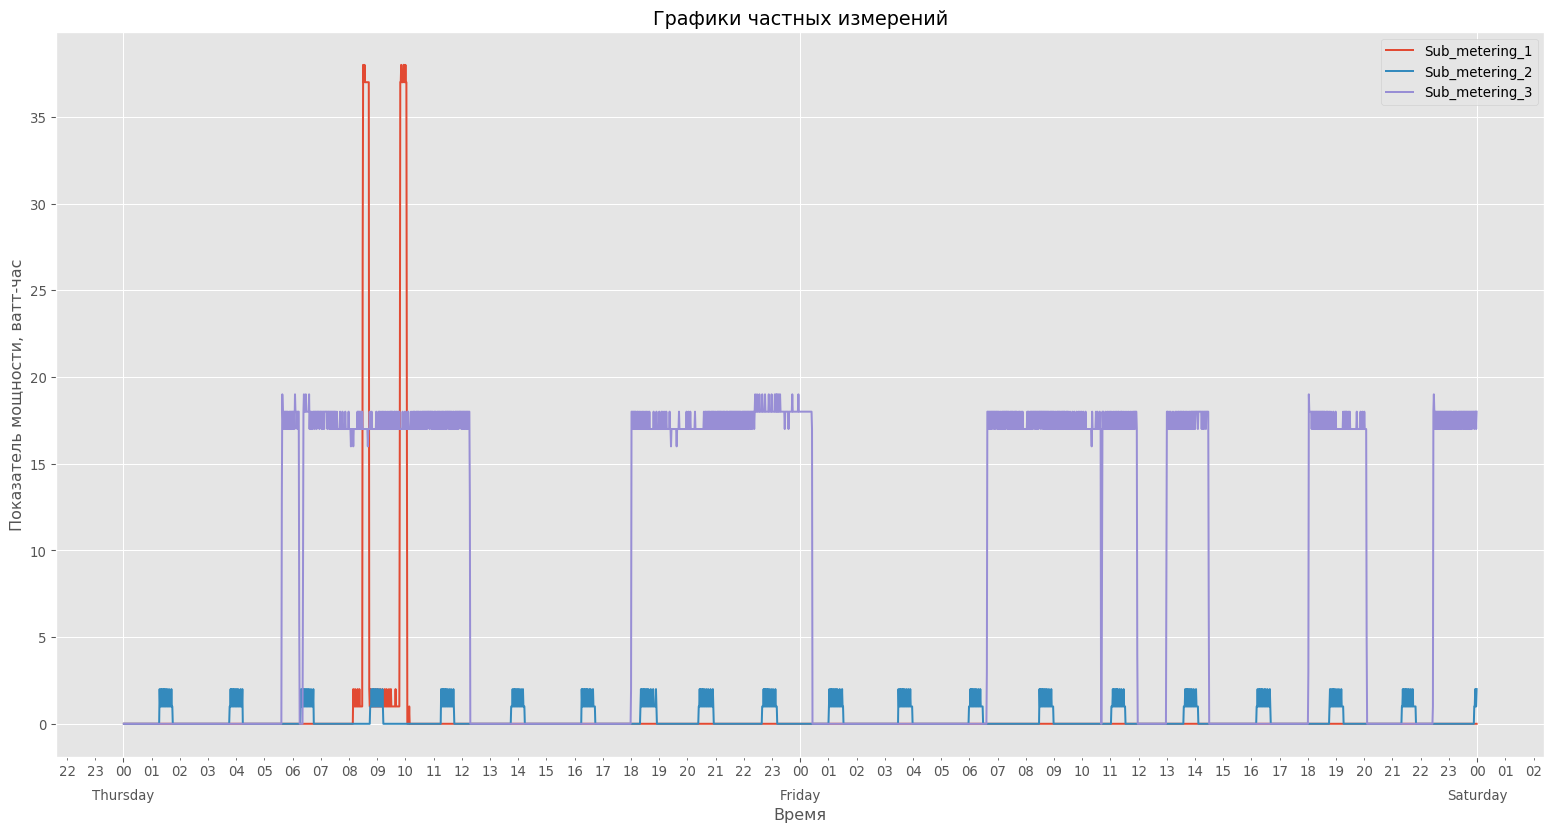

In [8]:
sec = plt.figure(figsize=(20,10), dpi = 96)
ax = sec.add_subplot(111)
plt.title('Графики частных измерений')
plt.ylabel('Показатель мощности, ватт-час')
plt.xlabel('Время')
plt.plot(x_g, s1_g)
plt.plot(x_g, s2_g)
plt.plot(x_g, s3_g)
ax.legend(['Sub_metering_1','Sub_metering_2','Sub_metering_3'])
ax.xaxis.set_major_formatter(dates.DateFormatter('%A'))
ax.xaxis.set_major_locator(dates.DayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H'))
ax.xaxis.set_minor_locator(dates.HourLocator())
ax.tick_params(axis='x', which='major', pad=20)

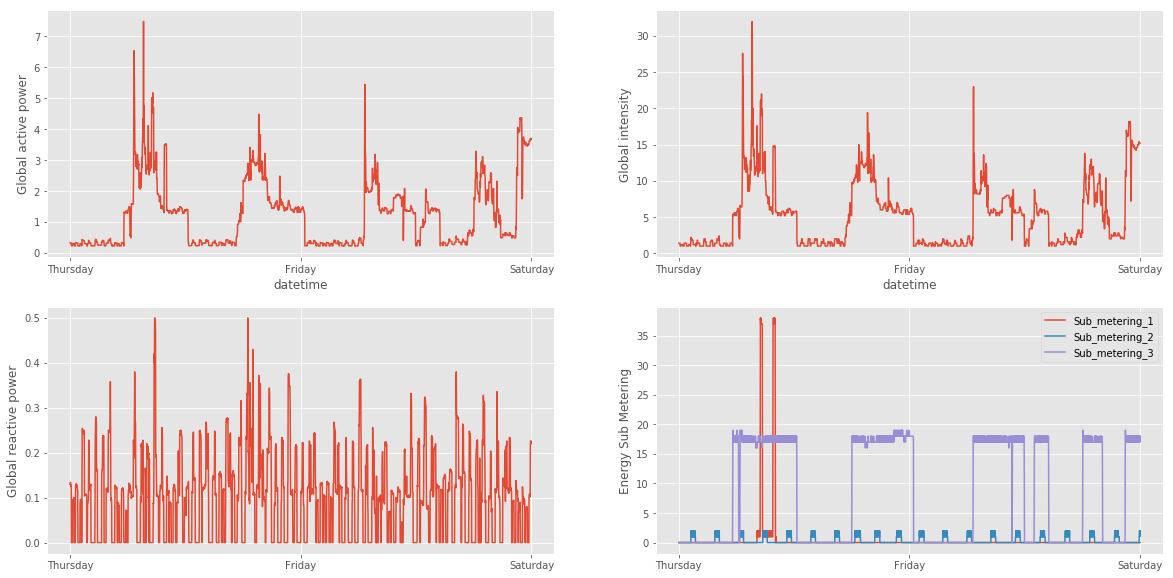

In [15]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
plt.plot(x_g, ap_g)
ax2 = fig.add_subplot(222)
plt.plot(x_g, c_g)
ax3 = fig.add_subplot(223)
plt.plot(x_g, rp_g)
ax4 = fig.add_subplot(224)
plt.plot(x_g, s1_g)
plt.plot(x_g, s2_g)
plt.plot(x_g, s3_g)
ax.set_xlabel('datetime')
ax2.set_xlabel('datetime')
ax.set_ylabel('Global active power')
ax2.set_ylabel('Global intensity')
ax3.set_ylabel('Global reactive power')
ax4.set_ylabel('Energy Sub Metering')
ax4.legend(['Sub_metering_1','Sub_metering_2','Sub_metering_3'])
for axx in fig.get_axes():
    axx.xaxis.set_major_formatter(dates.DateFormatter('%A'))
    axx.xaxis.set_major_locator(dates.DayLocator())

- Потребляемая мощность бывает до 8 кВт
- Хорошо видна тенденция к повышенному энергопотреблению с утра до обеда, и вечером до полуночи
- В пятницу вечером наблюдается повышенное энергопотребление
- Кухня использовалась с 8 до 10 утра 1 февраля
- Заметны периоды работы компрессора холодильника каждые 2-3 часа
- Наибольший расход энергии уходит на кондиционер и водонагреватель
 